# Import Library & Load Dataset

In [ ]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# load dataset
df = pd.read_csv('../data/college.csv')
df.head()

Index(['StudentID', 'Gender', 'Parent_income', 'IQ', 'Encourage', 'Plan'], dtype='object')


# Eksplorasi Data

In [4]:
# untuk melihat informasi dataset
df.info()

# untuk melihat statistik deskriptif dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   Gender         8000 non-null   object
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   object
 5   Plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


,StudentID,Parent_income,IQ
count,8000.00000,8000.000000,8000.000000
mean,4000.50000,40584.017500,99.577750
std,2309.54541,18031.506468,18.923655
min,1.00000,4500.000000,60.000000
25%,2000.75000,29400.000000,90.000000
50%,4000.50000,39330.000000,100.000000
75%,6000.25000,51592.500000,110.000000
max,8000.00000,82390.000000,140.000000


In [5]:
# untuk mengecek missing values
df.isnull().sum()

StudentID        0
Gender           0
Parent_income    0
IQ               0
Encourage        0
Plan             0
dtype: int64

# Menentukan Fitur & Target

In [13]:
# Menentukan Fitur & Target
feature_cols = ['Gender','Parent_income','IQ','Encourage','Plan']
X = pd.get_dummies(df[feature_cols], drop_first=True)
y = df['Plan']

# Split data Menjadi Data Latih & Train

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Membuat & Melatih Model Decision Tree

In [15]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Evaluasi Model

In [16]:
y_pred = model.predict(X_test)
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi:", classification_report(y_test, y_pred))

Confusion Matrix: [[1093    0]
 [   0  507]]

Laporan Klasifikasi:               precision    recall  f1-score   support

    not plan       1.00      1.00      1.00      1093
        plan       1.00      1.00      1.00       507

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



# Visualisasi Decision Tree

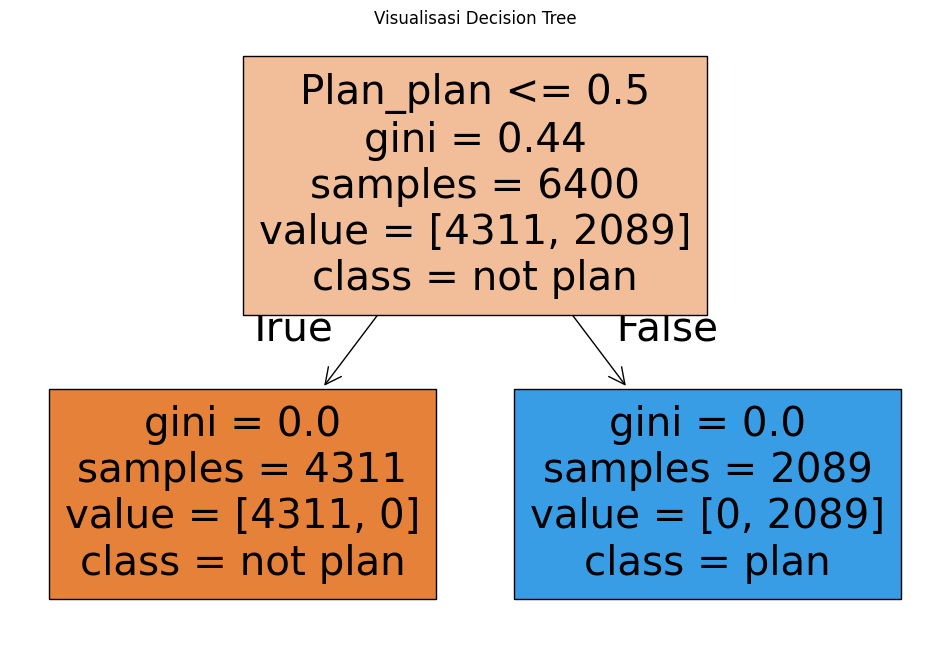

In [17]:
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.title('Visualisasi Decision Tree')
plt.show()